<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Deep-Learning/blob/main/P06_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 6**

Write a Program to implement CNN Algorithm for image classification.

In [1]:
#libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


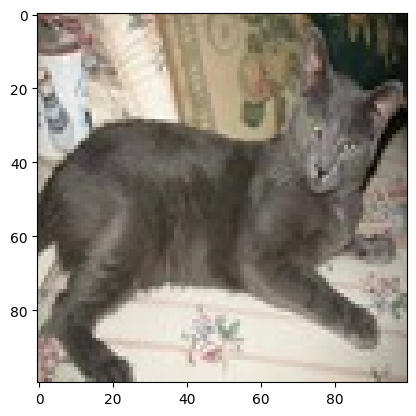

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 656ms/step - accuracy: 0.5184 - loss: 0.7334
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 606ms/step - accuracy: 0.6414 - loss: 0.6415
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 671ms/step - accuracy: 0.6510 - loss: 0.6036
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - accuracy: 0.7360 - loss: 0.5528
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 666ms/step - accuracy: 0.8001 - loss: 0.4389
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5830 - loss: 0.7369


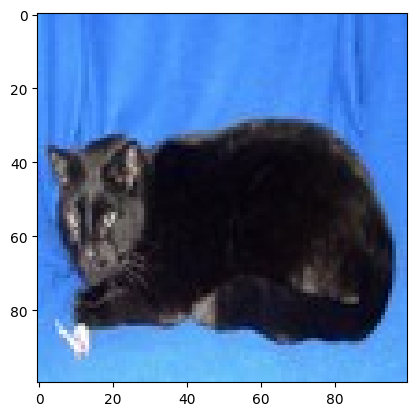

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Our model says it is a : cat


In [2]:
# 1. Load Dataset
X_train = np.loadtxt('/content/drive/MyDrive/7TH SEM/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/7TH SEM/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/7TH SEM/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/7TH SEM/labels_test.csv', delimiter = ',')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


# 2. Model Fitiing
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

model.evaluate(X_test, Y_test)

# 3. Predictions
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)